# Common

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() { if (code_show){$('div.input').hide();} else {$('div.input').show();}; code_show = !code_show};
// $( document ).ready(code_toggle);
$('div.output').click(function(){$(this).parent().prevAll('div.input:first').toggle()});
$(':header').click(function(){$(this).parentsUntil('.cell').parent().nextUntil(':has(:header)').toggle();})
$(':header').each(function(){$(this).parentsUntil('.cell').parent().nextUntil(':has(:header)').toggle();})
</script>''')

In [7]:
from __future__ import print_function
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt

try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
from keras.utils import np_utils

Populating the interactive namespace from numpy and matplotlib


In [14]:
#X[1]: 28x28 matrix of uint8; y[1] number from 0 to 9
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.15, random_state=0)
X_train = X_train.astype('float32') /255                                 # normalize data from 0 to 1
# X_valid = X_valid.astype('float32') /255
X_test = X_test.astype('float32') /255
Y_train = np_utils.to_categorical(y_train, 10)# convert class vectors to binary class matrices
# Y_valid = np_utils.to_categorical(Y_valid, 10)
Y_test = np_utils.to_categorical(y_test, 10)
img_rows, img_cols = X_train.shape[1:]
print(X_train.shape[0],  X_test.shape[0])
print('\n',X_train.shape,Y_train.shape,y_train.shape) 

60000 10000

 (60000, 28, 28) (60000, 10) (60000,)


[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


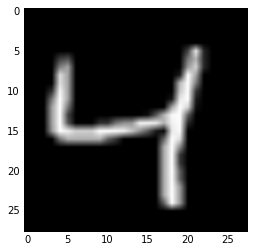

In [3]:
print(Y_train[2])
plt.imshow(X_train[2], cmap='gray');

# MLP (https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py)

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
batch_size = 128
nb_epoch = 5

### Data reshape

In [21]:
X_train_ = X_train.reshape(X_train.shape[0], -1)
# X_valid_ = X_valid.reshape(X_valid.shape[0], -1)
X_test_ = X_test.reshape(X_test.shape[0], -1)

### Model

In [22]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train_.shape[1],))) #can have init="glorot_normal",W_regularizer=l2(0.1)
model.add(Activation('relu'))
# model.add(Dropout(.5))
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax')) #or: relu,sigmoid, tanh
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 512)           401920      dense_input_3[0][0]              
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 512)           0           dense_5[0][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 10)            5130        activation_5[0][0]               
____________________________________________________________________________________________________
activation_6 (Activation)        (None, 10)            0           dense_6[0][0]                    
Total params: 407050
______________________________________________________________________

### Train

In [23]:
model.compile(loss='categorical_crossentropy', #or 'mse',
                     optimizer=RMSprop(),             #or 'SGD(lr,momentum,nesterov=True), RMSprop(), or 'sgd'...
                     metrics=['accuracy'])                #metrics to show during fit
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train_, Y_train,
             batch_size=batch_size, nb_epoch=nb_epoch*100,
             verbose=1,callbacks=[es],
             validation_split=0.5) #or validation_data=(X_valid_, Y_valid)

Train on 30000 samples, validate on 30000 samples
Epoch 1/500
30000/30000 [==============================] - 2s - loss: 0.3430 - acc: 0.9011 - val_loss: 0.2182 - val_acc: 0.9363
Epoch 2/500
30000/30000 [==============================] - 2s - loss: 0.1500 - acc: 0.9550 - val_loss: 0.1715 - val_acc: 0.9494
Epoch 3/500
30000/30000 [==============================] - 2s - loss: 0.0980 - acc: 0.9701 - val_loss: 0.1347 - val_acc: 0.9593
Epoch 4/500
30000/30000 [==============================] - 2s - loss: 0.0685 - acc: 0.9795 - val_loss: 0.1191 - val_acc: 0.9648
Epoch 5/500
30000/30000 [==============================] - 2s - loss: 0.0499 - acc: 0.9852 - val_loss: 0.1290 - val_acc: 0.9625
Epoch 6/500
30000/30000 [==============================] - 2s - loss: 0.0374 - acc: 0.9889 - val_loss: 0.1098 - val_acc: 0.9684
Epoch 7/500
30000/30000 [==============================] - 2s - loss: 0.0271 - acc: 0.9925 - val_loss: 0.1174 - val_acc: 0.9668
Epoch 8/500
30000/30000 [=============================

In [29]:
history.history

{'acc': [0.90110000000000001,
  0.95503333330154416,
  0.97009999996821084,
  0.97953333336512249,
  0.98516666669845576,
  0.98886666666666667,
  0.99250000003178918,
  0.99433333336512253,
  0.996,
  0.99743333333333328,
  0.99816666666666665,
  0.99880000000000002,
  0.99909999999999999,
  0.99936666666666663],
 'loss': [0.34299373235702513,
  0.15003986801306407,
  0.098027705152829492,
  0.068476677703857416,
  0.049942020930846535,
  0.037383169922232624,
  0.027131672017772994,
  0.020367233192920685,
  0.014658940723290046,
  0.010610352415591478,
  0.0080119932460288208,
  0.0055473362608502311,
  0.0039937746225235365,
  0.0032400347576476635],
 'val_acc': [0.93626666666666669,
  0.94940000000000002,
  0.95933333333333337,
  0.96476666666666666,
  0.96250000000000002,
  0.96843333333333337,
  0.96676666666666666,
  0.96886666666666665,
  0.97040000000000004,
  0.97276666666666667,
  0.97250000000000003,
  0.96896666666666664,
  0.9734666666666667,
  0.97293333333333332],
 'va

### Evaluate

In [10]:
score = model.evaluate(X_test_, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y_hat = model.predict_classes(X_test_)
pd.crosstab(y_hat, y_test)

Test score: 0.0761385265821
Test accuracy: 0.9771
 9760/10000 [============================>.] - ETA: 0s

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,0,6,0,1,3,9,1,3,2
1,0,1126,2,0,0,0,3,6,0,2
2,0,2,1006,3,2,0,0,8,3,0
3,0,1,1,989,0,7,1,3,5,3
4,0,0,1,0,956,1,2,0,3,3
5,1,1,0,5,0,872,6,0,10,4
6,1,2,3,2,4,5,934,0,2,0
7,0,0,4,3,0,0,0,980,2,0
8,3,3,8,3,1,3,3,5,939,0


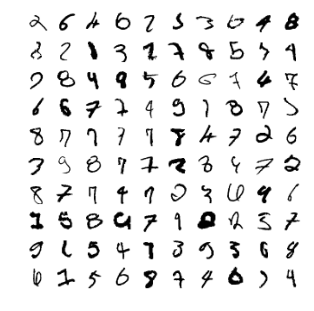

In [23]:
test_wrong = [im for im in zip(X_test_,y_hat,y_test) if im[1] != im[2]]
for ind, val in enumerate(test_wrong[:100]):
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((img_rows, img_cols,))
    axis("off")
    plt.imshow(im, cmap='gray')

weight matrix transposed: (512, 784)


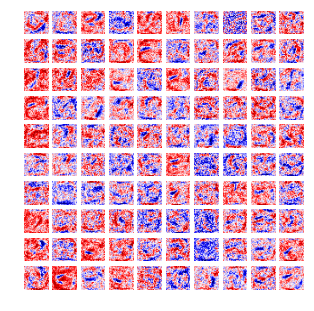

In [28]:
W1 = model.layers[0].get_weights()[0] # 0 for weights, 1 for bias
print("weight matrix transposed:",W1.T.shape)
plt.figure(figsize=(5, 5))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    im = W1.T[i].reshape((img_rows, img_cols,))
    plt.axis("off")
    plt.imshow(im, cmap='seismic')

# CNN (https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 128
nb_classes = 10   
nb_epoch = 5
nb_filters = 32                 # number of convolutional filters to use
pool_size = (2, 2)              # size of pooling area for max pooling
kernel_size = (3, 3)            # convolution kernel size

### Data

In [5]:
if K.image_dim_ordering() == 'th':
    X_train_ = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#     X_valid_ = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    X_test_ = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
elif  K.image_dim_ordering() == 'tf':
    X_train_ = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#     X_valid_ = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    X_test_ = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Y_train_ = np_utils.to_categorical(y_train, nb_classes)
# Y_valid_ = np_utils.to_categorical(y_valid, nb_classes)
Y_test_ = np_utils.to_categorical(y_test, nb_classes)

### model

In [6]:
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 26, 26)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 32, 24, 24)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

### Train

In [ ]:
model.fit(X_train_, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1,validation_data=(X_test_, Y_test))

scores = model.evaluate(X_test_, Y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
11136/60000 [====>.........................] - ETA: 224s - loss: 0.9223 - acc: 0.7125

# HRNN (https://github.com/fchollet/keras/blob/master/examples/mnist_hierarchical_rnn.py)

In [9]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM
batch_size = 32
nb_epochs = 5
row_hidden = 128
col_hidden = 128

### Data

In [16]:
X_train_ = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test_ = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
row, col, pixel = X_train_.shape[1:]

### Model

In [14]:
x = Input(shape=(row, col, pixel))
encoded_rows = TimeDistributed(LSTM(output_dim=row_hidden))(x)
encoded_columns = LSTM(col_hidden)(encoded_rows)
prediction = Dense(10, activation='softmax')(encoded_columns)
model = Model(input=x, output=prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
timedistributed_2 (TimeDistribute(None, 28, 128)       66560       input_2[0][0]                    
____________________________________________________________________________________________________
lstm_4 (LSTM)                    (None, 128)           131584      timedistributed_2[0][0]          
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            1290        lstm_4[0][0]                     
Total params: 199434
______________________________________________________________________

In [ ]:
model.fit(X_train_, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,verbose=1,validation_data=(X_test_, Y_test))

scores = model.evaluate(X_test_, Y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])